# spaceNNtime in simulated experiments

In this notebook I run spaceNNtime in a example as a demonstration and later analise other experiments

<a name="Home4"></a>

## Contents

0. [ Library and packages ](#Lib)
1. [ Functions ](#Fun)
    + 1. [Python Functions](#Pyf)
    + 2. [R Functions](#Rfu)
2. [ spaceNNtime results in simulations ](#Exp)
    + 1. [Presentation of experiment simulated data](#Prs)
    + 2. [Allele counts per selected individuals](#All)
    + 3. [Coordinates and sampling time per individual](#Coo)
    + 4. [spaceNNtime on the first set of test individuals](#sNt)
    + 5. [Analise results](#Ana)
    + 6. [Summary results](#Sum)
        - **DOWNSAMPLING EXPERIMENT**
        - 1. [Exp001 : 15,000 randomly uniformally distributed samples ](#001)
        - 2. [Exp002 : 10,000 randomly uniformally distributed samples ](#002)
        - 3. [Exp003 :  5,000 randomly uniformally distributed samples ](#003)
        - 4. [Exp004 :  1,500 randomly uniformally distributed samples ](#004)
        - 5. [Exp005 :  1,000 randomly uniformally distributed samples ](#005)
        - 6. [Exp006 :    500 randomly uniformally distributed samples ](#006)
        - 7. [Exp007 :    250 randomly uniformally distributed samples ](#007)
        - **EXPONENTIALLY SAMPLED (similarly to MesoNeo data)**
        - 8. [Exp008 :  1,500 randmoly exponentially distributed samples ](#008)
        - **SNP DENSITY EXPERIMENT**
        - 9. [Exp009 :  1,500 randmoly uniformally distributed samples with 75% SNP density ](#009)
        - 10. [Exp010 :  1,500 randmoly uniformally distributed samples with 50% SNP density ](#0010)
        - 11. [Exp011 :  1,500 randmoly uniformally distributed samples with 25% SNP density ](#011)
        - 12. [Exp012 :  1,500 randmoly uniformally distributed samples with 15% SNP density ](#012)
        - **TRAINING SPACE AND TIME SEPARATELY**
        - 13. [Exp013 :  1,500 randmoly uniformally distributed samples predicting space only ](#011)
        - 14. [Exp014 :  1,500 randmoly uniformally distributed samples predicting time only ](#012)
    + 7. [Summary results all together](#Tog)
        
<a name="011"></a>
#### L. Exp011 :  1,500 randmoly exponentially distributed samples with 25% SNP density
   
<a name="Lib"></a>
## 0. Library and packages

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
.libPaths()

[1] "/maps/projects/racimolab/people/qxz396/miniconda3/envs/sNNt_slendr/lib/R/library"


In [3]:
%%R
.libPaths(c("/maps/projects/racimolab/people/qxz396/spaceNNtime/backup/environments/renv/library/R-4.1/x86_64-redhat-linux-gnu"))

library(ggplot2)
library(cowplot)
library(tidyverse)
library(stringr)
library(sf)
library(slendr)
library(rnaturalearth)
library(rnaturalearthdata)

options(dplyr.summarise.inform = FALSE)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ tibble  3.1.6     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: Linking to GEOS 3.7.2, GDAL 3.0.4, PROJ 6.3.2; sf_use_s2() is TRUE

R[write to console]: You can setup a pre-configured environment with all of slendr's Python
tree-sequence dependencies (Python modules tskit, pyslim, and msprime)
by running the function setup_env().



In [4]:
%%R

gg_color_hue <- function(n) {
  hues = seq(15, 375, length = n + 1)
  hcl(h = hues, l = 65, c = 100)[1:n]
}

colors = gg_color_hue(6)
col_pop = c("ALL" = "black",
            "AFR" = colors[1], "OOA" = colors[2], "EHG" = colors[3],
            "ANA" = colors[4], "EUR" = colors[5], "YAM" = colors[6])


In [5]:
%%R
.libPaths()

[1] "/maps/projects/racimolab/people/qxz396/spaceNNtime/backup/environments/renv/library/R-4.1/x86_64-redhat-linux-gnu"
[2] "/maps/projects/racimolab/people/qxz396/miniconda3/envs/sNNt_slendr/lib/R/library"                                 



[<img src="arrow.png" width="100" style="float: left;">](#Home4) &nbsp;

&nbsp;

<a name="Fun"></a>
## 1. Functions

<a name="Pfu"></a>
### A. Python Functions

<a name="Rfu"></a>
### B. R Functions


[<img src="arrow.png" width="100" style="float: left;">](#Home4) &nbsp;

&nbsp;

<a name="Exp"></a>
## 2. spaceNNtime results in simulations

<a name="Prs"></a>
### A. Presentation of experiment simulated data

In the table below, we can check each simulation experiment that has been run, its attributes and running conditions.

In [25]:
%%R

read.csv("../../files/experiments.csv", sep = ";") %>%
    select(-c(tim))

      sim exp         nam met   siz  snp   pre    typ cov  err nod mem    que
1  europe   1  downsample   1 15000 1.00  sNNt     gt   0 0.00 256 20g    gpu
2  europe   2  downsample   2 10000 1.00  sNNt     gt   0 0.00 256  8g    gpu
3  europe   3  downsample   3  5000 1.00  sNNt     gt   0 0.00 256  2g normal
4  europe   4        gold   4  1500 1.00  sNNt     gt   0 0.00 256  1g normal
5  europe   5  downsample   5  1000 1.00  sNNt     gt   0 0.00 256  1g normal
6  europe   6  downsample   6   500 1.00  sNNt     gt   0 0.00 256  1g normal
7  europe   7  downsample   7   250 1.00  sNNt     gt   0 0.00 256  1g normal
8  europe   8    sampling   8  real 1.00  sNNt     gt   0 0.00 256  1g normal
9  europe   9 snp_density   4  1500 0.75  sNNt     gt   0 0.00 256  1g normal
10 europe  10 snp_density   4  1500 0.50  sNNt     gt   0 0.00 256  1g normal
11 europe  11 snp_density   4  1500 0.25  sNNt     gt   0 0.00 256  1g normal
12 europe  12 snp_density   4  1500 0.10  sNNt     gt   0 0.00 2


[<img src="arrow.png" width="100" style="float: left;">](#Home4) &nbsp;

&nbsp;

<a name="Ana"></a>
### E. Analise results

For each experiment, there is a `pred.txt` file which contains all necessary information to visualize results:

In [7]:
%%R

read.table("../../sandbox/europe/4/pred.txt", header = T) %>%
    head()

     sim exp  nam   ind typ group index n_snps run_time real_latitude_norm
1 europe   4 gold 41517  gt     0    44   1344 1.445837         -0.3007662
2 europe   4 gold 37861  gt     0   118   1344 1.445837         -2.2769378
3 europe   4 gold  5791  gt     0   511   1344 1.445837          0.6370503
4 europe   4 gold 10238  gt     1   212   1344 1.374194          1.0217549
5 europe   4 gold  6002  gt     1   414   1344 1.374194          0.6836681
6 europe   4 gold 24096  gt     1   812   1344 1.374194         -0.3448682
  real_longitude_norm real_time_norm pred_latitude_norm pred_longitude_norm
1           1.7085160     -1.3749213         -0.3336625           1.5207913
2           0.5755739     -1.1134602         -1.2238423           0.9665417
3          -1.4482014      1.2755702          0.6456226          -0.9670564
4          -0.2458928      0.8816741          1.0126266          -0.2510838
5          -1.1602709      1.2566866         -0.3093041          -0.8683058
6           1.51215

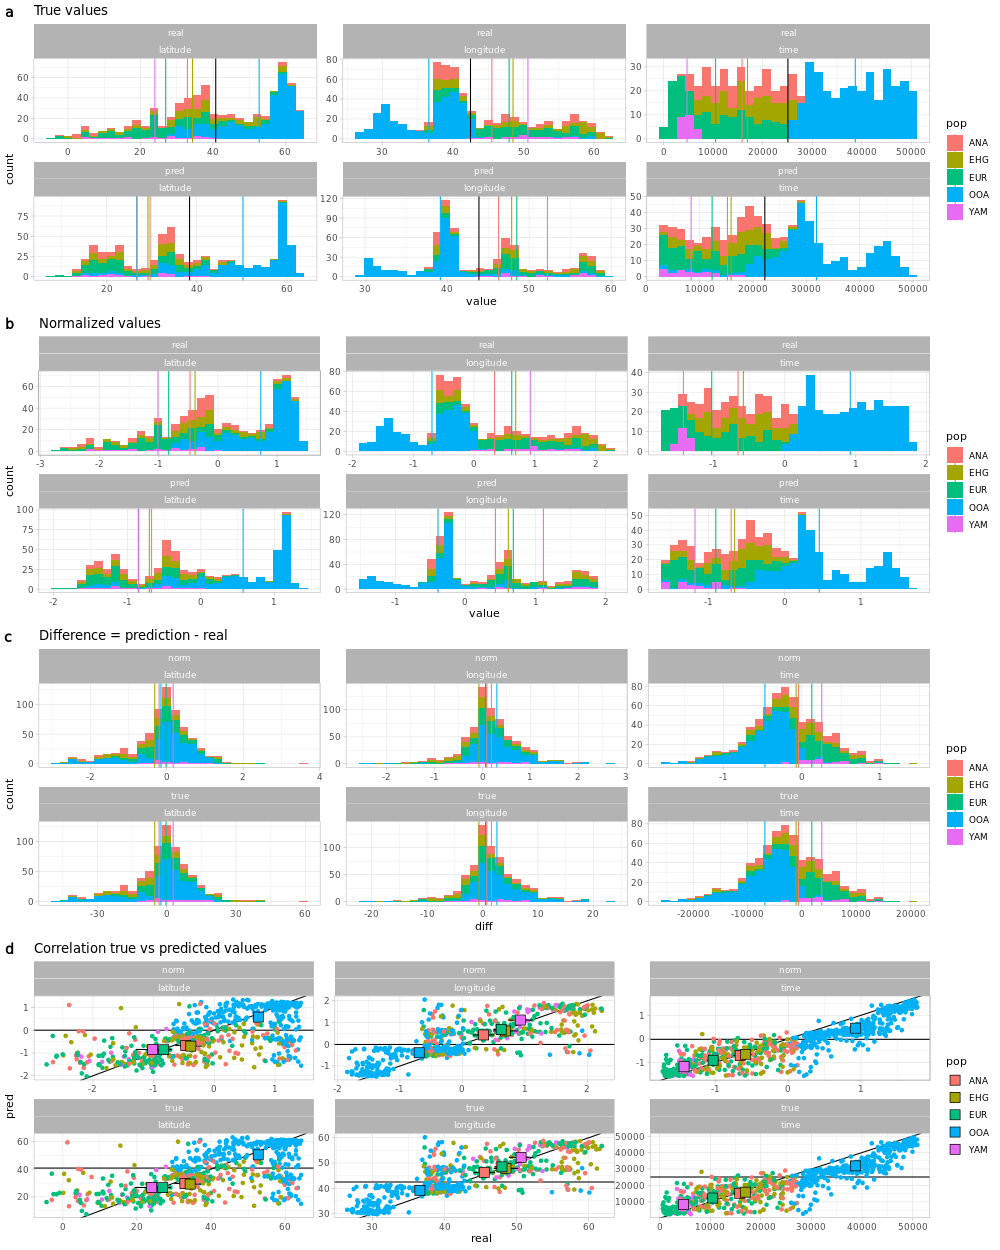

In [27]:
%%R -w 1000 -h 1250

exp = "25"

read.table(paste("../../sandbox/europe/", exp, "/pred.txt", sep = ""), header = T) %>%
    rename(real_latitude_true  = real_latitude, 
           real_longitude_true = real_longitude, 
           real_time_true      = real_time,
           pred_latitude_true  = pred_latitude, 
           pred_longitude_true = pred_longitude, 
           pred_time_true      = pred_time) %>%
    filter(abs(real_latitude_norm-pred_latitude_norm) < 10) %>%
    gather(stat, value, 10:21) %>%
    separate(stat, c("realpred", "stat", "normtrue"), sep = "_") %>%
    spread(realpred, value) %>%
    left_join(read.table("../../data/europe/metadata.txt", header = T) %>% select(ind = ind_id, pop), by = c("ind")) %>%
    mutate(diff = pred-real) -> df

plot_grid(
    df %>%
        gather("predreal", "value", pred, real) %>%
        filter(normtrue == "true") %>%
        mutate(predreal = factor(predreal, levels = c("real", "pred"))) %>%
        ggplot() +
        geom_histogram(aes(x = value, fill = pop), bins = 30) + 
        geom_vline(data = . %>% group_by(pop, stat, predreal) %>% summarize(mean = mean(value)), aes(xintercept = mean, color = pop)) +
        geom_vline(data = . %>% group_by(stat, predreal) %>% summarize(mean = mean(value)), aes(xintercept = mean)) +
        facet_wrap(predreal~stat, scales = "free") +
        theme_light() +
        ggtitle("True values"),
    df %>%
        gather("predreal", "value", pred, real) %>%
        filter(normtrue == "norm") %>%
        mutate(predreal = factor(predreal, levels = c("real", "pred"))) %>%
        ggplot() +
        geom_histogram(aes(x = value, fill = pop), bins = 30) + 
        geom_vline(data = . %>% group_by(pop, stat, predreal) %>% summarize(mean = mean(value)), aes(xintercept = mean, color = pop)) +
        facet_wrap(predreal~stat, scales = "free") +
        theme_light() +
        ggtitle("Normalized values"),
    df %>%
        ggplot() +
        geom_histogram(aes(x = diff, fill = pop), bins = 30) + 
        geom_vline(data = . %>% group_by(pop, stat, normtrue) %>% summarize(mean = mean(diff)), aes(xintercept = mean, color = pop)) +
        facet_wrap(normtrue~stat, scales = "free") +
        theme_light() +
        ggtitle("Difference = prediction - real"),
    df %>%
        ggplot() +
        geom_abline(slope = 1, intercept = 0) +
        geom_hline(data = . %>% group_by(stat, normtrue) %>% summarize(mean = mean(real)), aes(yintercept = mean)) +
        geom_point(aes(x = real, y = pred, color = pop)) +
        geom_errorbar(data = . %>% group_by(pop, stat, normtrue) %>% summarize(mean_pred = mean(pred), 
                                                                               mean_real = mean(real),
                                                                               se_pred   = 1.96*(sd(pred)/sqrt(n())),
                                                                               se_real   = 1.96*(sd(real)/sqrt(n()))), 
                      aes(x = mean_real, ymin = mean_pred-se_pred, ymax = mean_pred+se_pred)) +
        geom_errorbar(data = . %>% group_by(pop, stat, normtrue) %>% summarize(mean_pred = mean(pred), 
                                                                               mean_real = mean(real),
                                                                               se_pred   = 1.96*(sd(pred)/sqrt(n())),
                                                                               se_real   = 1.96*(sd(real)/sqrt(n()))), 
                      aes(y = mean_pred, xmin = mean_real-se_real, xmax = mean_real+se_real)) +
        geom_point(data = . %>% group_by(pop, stat, normtrue) %>% summarize(mean_pred = mean(pred), 
                                                                            mean_real = mean(real)), 
                   aes(x = mean_real, y = mean_pred, fill = pop), shape = 22, size = 5) +
        facet_wrap(normtrue~stat, scales = "free") +
        theme_light() +
        ggtitle("Correlation true vs predicted values"),
    
    ncol = 1, labels = "auto"
)
    

In [9]:
%%R

df %>% 
    group_by(pop, stat, normtrue) %>% 
    summarize(mean_pred = mean(pred), mean_real = mean(real), mean_diff = mean(diff), sqrtdiff = mean(sqrt(diff^2))) %>%
    filter(normtrue == "true") %>%
    as.data.frame() %>%
    print()

   pop      stat normtrue   mean_pred   mean_real     mean_diff     sqrtdiff
1  ANA  latitude     true    36.96123    32.97351     3.9877176    16.503984
2  ANA longitude     true    44.15081    46.30346    -2.1526484     8.120707
3  ANA      time     true 19491.48351 16254.31556  3237.1679511 11332.997681
4  EHG  latitude     true    35.61364    33.83447     1.7791739    15.740456
5  EHG longitude     true    44.75796    48.53850    -3.7805476     8.728684
6  EHG      time     true 18361.31997 17357.83621  1003.4837605 10347.728442
7  EUR  latitude     true    35.99726    25.96395    10.0333056    17.275362
8  EUR longitude     true    45.04989    47.92291    -2.8730158     6.788387
9  EUR      time     true 17826.84255 10927.46341  6899.3791342 11837.114459
10 OOA  latitude     true    44.81554    52.92172    -8.1061739    12.943541
11 OOA longitude     true    36.62998    36.46299     0.1669952     4.795320
12 OOA      time     true 36107.57892 38668.64419 -2561.0652665  8571.170170

In [10]:
%%R

df %>% 
    group_by(pop, stat, normtrue) %>% 
    summarize(mean_pred = mean(pred), mean_real = mean(real), mean_diff = mean(diff)) %>%
    filter(normtrue == "true") %>%
    as.data.frame() %>%
    print()

   pop      stat normtrue   mean_pred   mean_real     mean_diff
1  ANA  latitude     true    36.96123    32.97351     3.9877176
2  ANA longitude     true    44.15081    46.30346    -2.1526484
3  ANA      time     true 19491.48351 16254.31556  3237.1679511
4  EHG  latitude     true    35.61364    33.83447     1.7791739
5  EHG longitude     true    44.75796    48.53850    -3.7805476
6  EHG      time     true 18361.31997 17357.83621  1003.4837605
7  EUR  latitude     true    35.99726    25.96395    10.0333056
8  EUR longitude     true    45.04989    47.92291    -2.8730158
9  EUR      time     true 17826.84255 10927.46341  6899.3791342
10 OOA  latitude     true    44.81554    52.92172    -8.1061739
11 OOA longitude     true    36.62998    36.46299     0.1669952
12 OOA      time     true 36107.57892 38668.64419 -2561.0652665
13 YAM  latitude     true    35.34573    25.52694     9.8187912
14 YAM longitude     true    46.44385    51.16339    -4.7195396
15 YAM      time     true 16411.46734  4

In [11]:
%%R

error_spaceNNtime <- function(sim, exp, pre){
    if(pre %in% c("sNNt", "time")){
        read.table(paste("../../sandbox/", sim,"/", exp,"/pred.txt", sep = ""), header = T) %>%
            select(sim, exp, nam, ind, typ, group, index, real_time, pred_time) %>%
            mutate(time = sqrt((real_time-pred_time)^2)) %>%
            select(-c(real_time, pred_time)) %>%
            arrange(sim, exp, nam, ind, typ, group, index) -> df_diff
    }else if(pre == "space"){
        read.table(paste("../../sandbox/", sim,"/", exp,"/pred.txt", sep = ""), header = T) %>%
            select(sim, exp, nam, ind, typ, group, index) %>%
            arrange(sim, exp, nam, ind, typ, group, index) -> df_diff
    }
    
    if(pre %in% c("sNNt", "space")){
        read.table(paste("../../sandbox/", sim,"/", exp,"/pred.txt", sep = ""), header = T) %>%
            select(sim, exp, nam, ind, typ, group, index, real_latitude, real_longitude, pred_latitude, pred_longitude) %>%
            gather("stat", "value", c(real_latitude, real_longitude, pred_latitude, pred_longitude)) %>%
            separate(stat, c("realpred", "latlon")) %>%
            spread(latlon, value) %>%
            arrange(sim, exp, nam, ind, typ, group, index) %>%
            filter(realpred == "real") %>%
            select("latitude", "longitude") %>%
            st_as_sf(coords = c("latitude", "longitude"), crs = 4326) -> real_coor

        read.table(paste("../../sandbox/", sim,"/", exp,"/pred.txt", sep = ""), header = T) %>%
            select(sim, exp, nam, ind, typ, group, index, real_latitude, real_longitude, pred_latitude, pred_longitude) %>%
            gather("stat", "value", c(real_latitude, real_longitude, pred_latitude, pred_longitude)) %>%
            separate(stat, c("realpred", "latlon")) %>%
            spread(latlon, value) %>%
            arrange(sim, exp, nam, ind, typ, group, index) %>%
            filter(realpred == "pred") %>%
            select("latitude", "longitude") %>%
            st_as_sf(coords = c("latitude", "longitude"), crs = 4326) -> pred_coor
        
        df_diff %>%
            mutate(space = as.numeric(sf::st_distance(real_coor, pred_coor, by_element = TRUE))/1e3) -> df_diff
        
    }
    
    if(pre == "sNNt"){
        df_diff %>%
            gather("stat", "value", c(space, time)) -> df_diff
    }else if(pre == "space"){
        df_diff %>%
            mutate(stat = "space") %>%
            rename(value = space) -> df_diff
    }else if(pre == "time"){
        df_diff %>%
            mutate(stat = "time") %>%
            rename(value = time) -> df_diff
    }
    df_diff %>%
        left_join(read.table(paste("../../data/", sim, "/metadata.txt", sep = ""), header = T) %>% select(ind = ind_id, pop), by = c("ind")) 
}


    
error_spaceNNtime(sim = "europe", exp = "1", pre = "sNNt") %>%
    head()

     sim exp        nam ind typ group index  stat      value pop
1 europe   1 downsample 128  gt    16  2778 space  1312.4727 OOA
2 europe   1 downsample 167  gt   415  7547 space   355.7227 OOA
3 europe   1 downsample 189  gt   309 11301 space  1805.7892 OOA
4 europe   1 downsample 249  gt   405  5510 space  1078.7284 OOA
5 europe   1 downsample 296  gt   139  2835 space 13109.1881 OOA
6 europe   1 downsample 297  gt   311 10234 space   243.1052 OOA


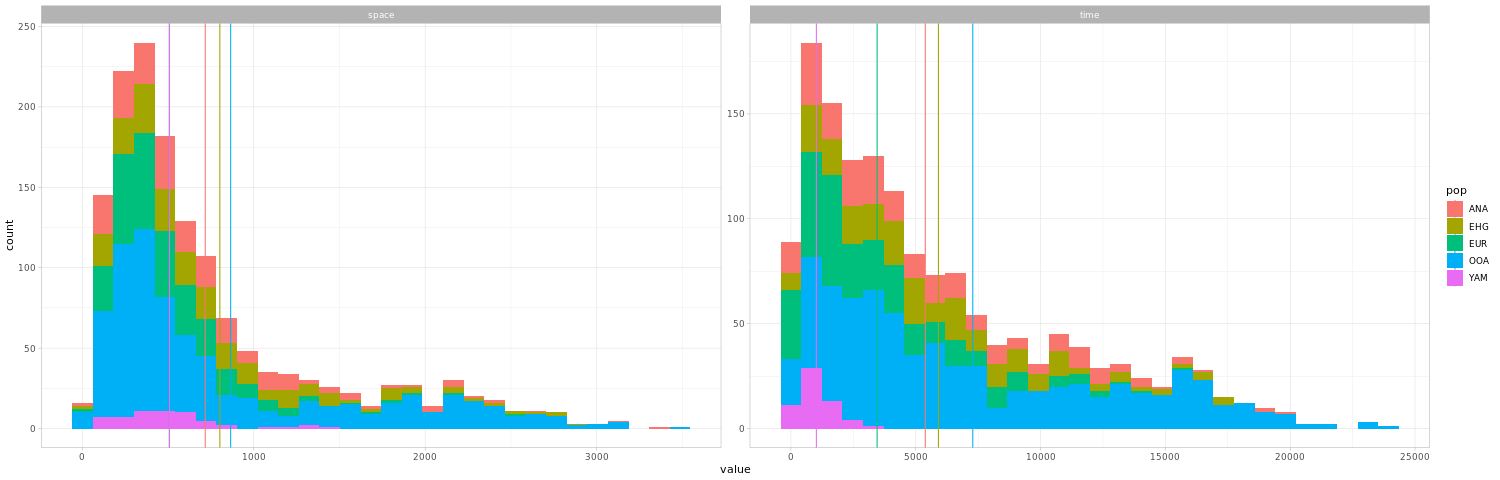

In [12]:
%%R -w 1500

error_spaceNNtime(sim = "europe", exp = 4, pre = "sNNt") %>%
    ggplot() +
    geom_histogram(aes(x = value, fill = pop), bins = 30) +
    geom_vline(data = . %>% group_by(pop, stat) %>% summarize(mean = mean(value)), aes(xintercept = mean, color = pop)) +
    facet_wrap(.~stat, scales = "free") +
    theme_light()

In [13]:
%%R

error_spaceNNtime_all_scenarios_per_pop <- function(){
    read.csv("../../files/experiments.csv", sep = ";") -> experiments
    
    all_scenarios = data.frame()
    
    for(i in 1:(experiments %>% nrow())){
    #for(i in c(14)){
        print(i)
        sim = experiments %>% pull(sim) %>% .[i]
        exp = experiments %>% pull(exp) %>% .[i]
        pre = experiments %>% pull(pre) %>% .[i]
        all_scenarios = rbind(all_scenarios, 
                              error_spaceNNtime(sim, exp, pre) %>%
                                  group_by(sim, exp, nam, typ, stat, pop) %>%
                                  summarize(mean = mean(value),
                                            se   = sd(value)/sqrt(n())) %>%
                                  mutate(exp = factor(exp))
                             )
            
    }
    all_scenarios
}

all_scenarios_per_pop <- error_spaceNNtime_all_scenarios_per_pop()
head(all_scenarios_per_pop)

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
# A tibble: 6 × 8
# Groups:   sim, exp, nam, typ, stat [2]
  sim    exp   nam        typ   stat  pop    mean    se
  <chr>  <fct> <chr>      <chr> <chr> <chr> <dbl> <dbl>
1 europe 1     downsample gt    space ANA    622.  32.4
2 europe 1     downsample gt    space EHG    722.  46.0
3 europe 1     downsample gt    space EUR    539.  23.6
4 europe 1     downsample gt    space OOA   1167.  73.2
5 europe 1     downsample gt    space YAM    531.  62.9
6 europe 1     downsample gt    time  ANA   4535. 206. 


In [14]:
%%R

error_spaceNNtime_all_scenarios_all <- function(){
    read.csv("../../files/experiments.csv", sep = ";") -> experiments
    
    all_scenarios = data.frame()
    
    for(i in 1:(experiments %>% nrow())){
    #for(i in c(14)){
        print(i)
        sim = experiments %>% pull(sim) %>% .[i]
        exp = experiments %>% pull(exp) %>% .[i]
        pre = experiments %>% pull(pre) %>% .[i]
        all_scenarios = rbind(all_scenarios, 
                              error_spaceNNtime(sim, exp, pre) %>%
                                  group_by(sim, exp, nam, typ, stat) %>%
                                  summarize(mean = mean(value),
                                            se   = sd(value)/sqrt(n())) %>%
                                  mutate(exp = factor(exp))
                             )
            
    }
    all_scenarios
}

all_scenarios_all <- error_spaceNNtime_all_scenarios_all()
head(all_scenarios_all)

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
# A tibble: 6 × 7
# Groups:   sim, exp, nam, typ [3]
  sim    exp   nam        typ   stat      mean        se
  <chr>  <fct> <chr>      <chr> <chr>    <dbl>     <dbl>
1 europe 1     downsample gt    space     876.      36.8
2 europe 1     downsample gt    time  1675284. 1315248. 
3 europe 2     downsample gt    space     708.      16.7
4 europe 2     downsample gt    time     6479.    1280. 
5 europe 3     downsample gt    space     642.      15.3
6 europe 3     downsample gt    time     3885.      90.9


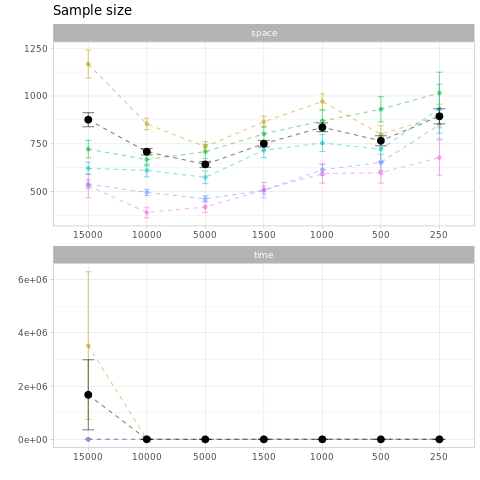

In [15]:
%%R

plot_errors <- function(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, title, xlab, ylab, nolegend = TRUE){
    
    ggplot() +
        geom_errorbar(data = all_scenarios_per_pop %>% filter(exp %in% exp_to_plot, !pop %in% filter_pop),
                   aes(x = exp, ymin = mean-se, ymax = mean+se, color = pop), alpha = 0.5, width = 0.1) +
        geom_line(data = all_scenarios_per_pop %>% filter(exp %in% exp_to_plot, !pop %in% filter_pop),
                   aes(x = exp, y = mean, color = pop, group = pop), alpha = 0.5, linetype = "dashed") +
        geom_point(data = all_scenarios_per_pop %>% filter(exp %in% exp_to_plot, !pop %in% filter_pop),
                   aes(x = exp, y = mean, color = pop), alpha = 0.5) +
        geom_errorbar(data = all_scenarios_all %>% filter(exp %in% exp_to_plot),
                   aes(x = exp, ymin = mean-se, ymax = mean+se, color = "ALL"), alpha = 0.5, width = 0.2) +
        geom_line(data = all_scenarios_all %>% filter(exp %in% exp_to_plot),
                   aes(x = exp, y = mean, color = "ALL", group = "ALL"), alpha = 0.5, linetype = "dashed") +
        geom_point(data = all_scenarios_all %>% filter(exp %in% exp_to_plot),
                   aes(x = exp, y = mean, color = "ALL"), size = 3) +
        labs(title=title, x = xlab, y = ylab) +
        scale_x_discrete(labels=labels, limits = limits) +
        scale_color_manual(values=col_pop) +
        facet_wrap(stat~., nrow = 2, scales = "free") +
        theme_light() -> plot 
    if(nolegend){
        plot + theme(legend.position = 'none')
    }else{
        plot
    }
}

filter_pop  = c()
exp_to_plot = c(1, 2, 3, 4, 5, 6, 7)
labels      = c("1" = 15000, "2" = 10000, "3" = 5000, "4" = 1500, "5" =  1000, "6" =   500, "7" =  250)
limits      = c("1", "2", "3", "4", "5", "6", "7")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Sample size", "", "", TRUE) -> p1

p1

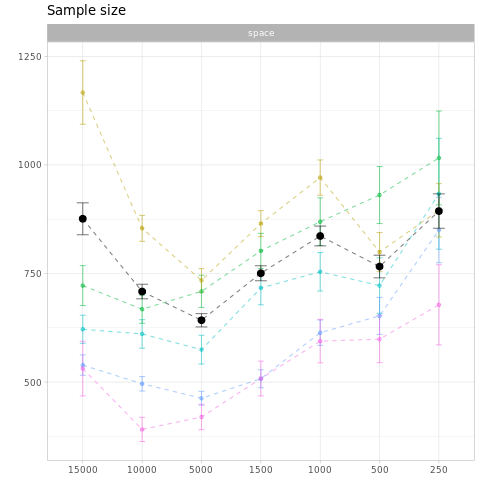

In [16]:
%%R

filter_pop  = c()
exp_to_plot = c(1, 2, 3, 4, 5, 6, 7)
labels      = c("1" = 15000, "2" = 10000, "3" = 5000, "4" = 1500, "5" =  1000, "6" =   500, "7" =  250)
limits      = c("1", "2", "3", "4", "5", "6", "7")
plot_errors(all_scenarios_per_pop %>% filter(stat == "space"), all_scenarios_all %>% filter(stat == "space"), 
            filter_pop, exp_to_plot, labels, limits, "Sample size", "", "", TRUE) +
    theme(axis.title.x=element_blank())-> p1a

p1a

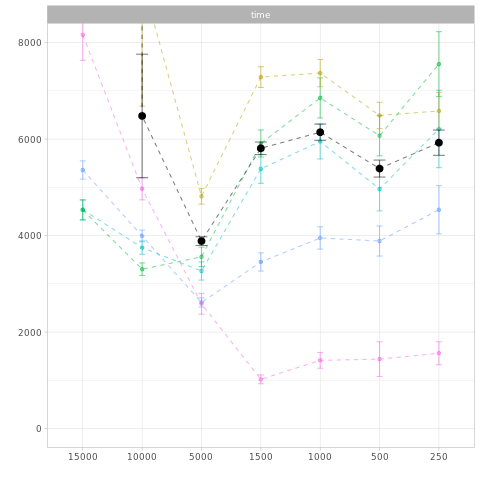

In [17]:
%%R

filter_pop  = c()
exp_to_plot = c(1, 2, 3, 4, 5, 6, 7)
labels      = c("1" = 15000, "2" = 10000, "3" = 5000, "4" = 1500, "5" =  1000, "6" =   500, "7" =  250)
limits      = c("1", "2", "3", "4", "5", "6", "7")
plot_errors(all_scenarios_per_pop %>% filter(stat == "time"), all_scenarios_all %>% filter(stat == "time"), 
            filter_pop, exp_to_plot, labels, limits, "", "", "", TRUE) + coord_cartesian(ylim = c(0, 8e3)) +
    theme(plot.title = element_blank())-> p1b

p1b

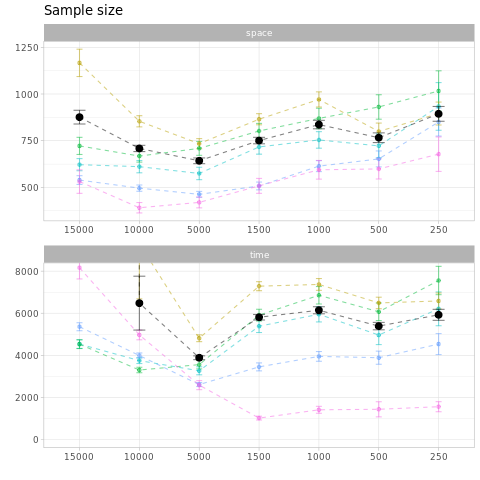

In [18]:
%%R

plot_grid(p1a, p1b, nrow = 2) -> p1
p1

In [19]:
%%R

filter_pop  = c()
exp_to_plot = c(4, 8)
labels      = c("4" = "unif", "8" = "exp")
limits      = c("4", "8")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Sampling", "", "", TRUE) -> p2

filter_pop  = c()
exp_to_plot = c(4, 9, 10, 11, 12)
labels      = c("4" = "100%", "9" = "75%", "10" = "50%", "11" = "25%", "12" = "10%")
limits      = c("4", "9", "10", "11", "12")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "SNP density", "", "", TRUE) -> p3

filter_pop  = c()
exp_to_plot = c(4, 13, 14)
labels      = c("4" = "sNNt", "13" = "space", "14" = "time")
limits      = c()
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Prediction", "", "", TRUE) -> p4

filter_pop  = c()
exp_to_plot = c(4, 15, 16, 17)
labels      = c("4" = "GT", "15" = "5x", "16" = "15x", "17" = "30x")
limits      = c("4", "15", "16", "17")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GL mix)", "", "", TRUE) -> p5

filter_pop  = c()
exp_to_plot = c(4, 21, 22, 23)
labels      = c("4" = "GT", "21" = "5x", "22" = "15x", "23" = "30x")
limits      = c("4", "21", "22", "23")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GL)", "", "", TRUE) -> p6

filter_pop  = c()
exp_to_plot = c(4, 24, 25, 26)
labels      = c("4" = "GT", "24" = "5x", "25" = "15x", "26" = "30x")
limits      = c("4", "24", "25", "26")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits,  "Coverage (GP)", "", "", TRUE) -> p7

filter_pop  = c()
exp_to_plot = c(4, 27, 28, 29)
labels      = c("4" = "GT", "27" = "5x", "28" = "15x", "29" = "30x")
limits      = c("4", "27", "28", "29")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP mix)", "", "", TRUE) -> p8

filter_pop  = c()
exp_to_plot = c(4, 30, 31, 32, 33)
labels      = c("4" = "GT", "30" = "1x", "31" = "5x", "32" = "15x", "33" = "30x")
limits      = c("4", "30", "31", "32", "33")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP to GT)", "", "", TRUE) -> p9

filter_pop  = c()
exp_to_plot = c(18, 19, 4, 20)
labels      = c("18" = "64", "19" = "128", "4" = "256", "20" = "512")
limits      = c("18", "19", "4", "20")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Nº nodes per hidden layer (10)", "", "") -> p10

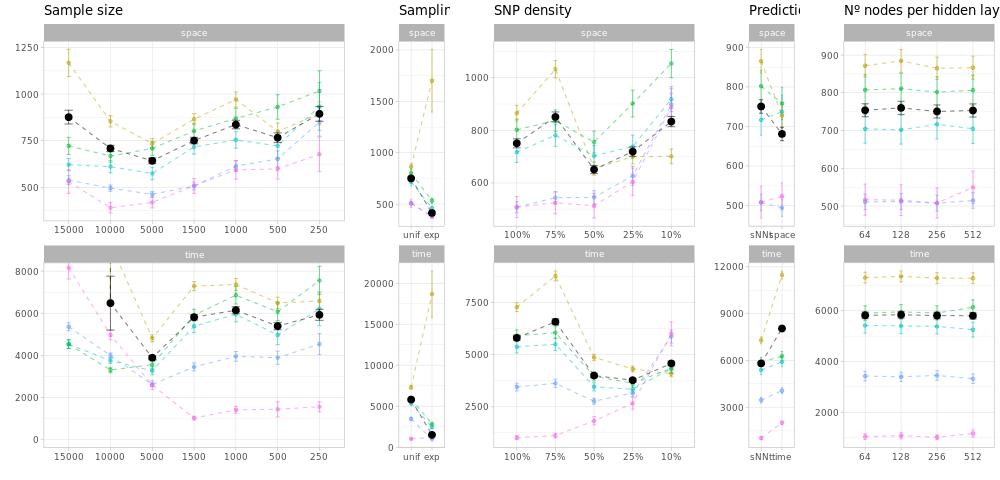

In [28]:
%%R -w 1000

plot_grid(p1, p2, p3, p4, p10, nrow = 1, rel_widths = c(7, 2, 5, 2, 4))

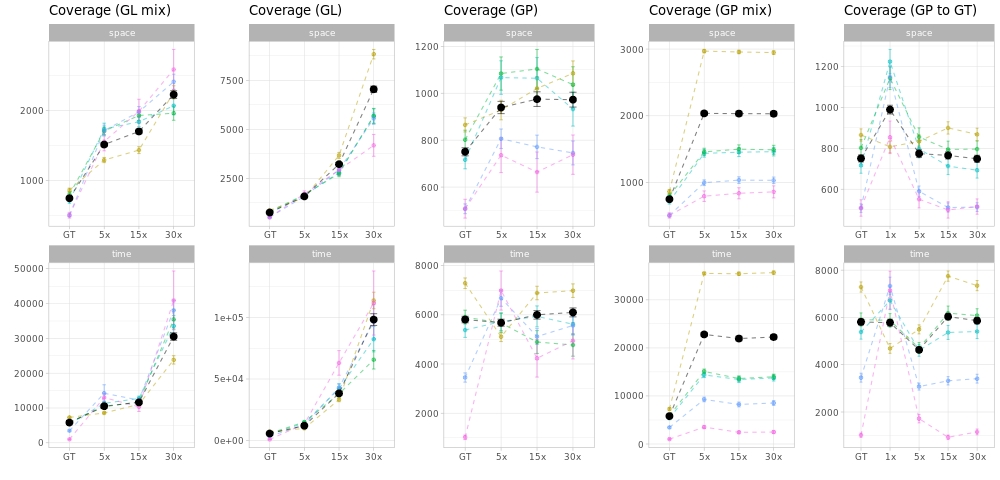

In [29]:
%%R -w 1000

plot_grid(p5, p6, p7, p8, p9, nrow = 1, rel_widths = c(4, 4, 4, 4, 4))

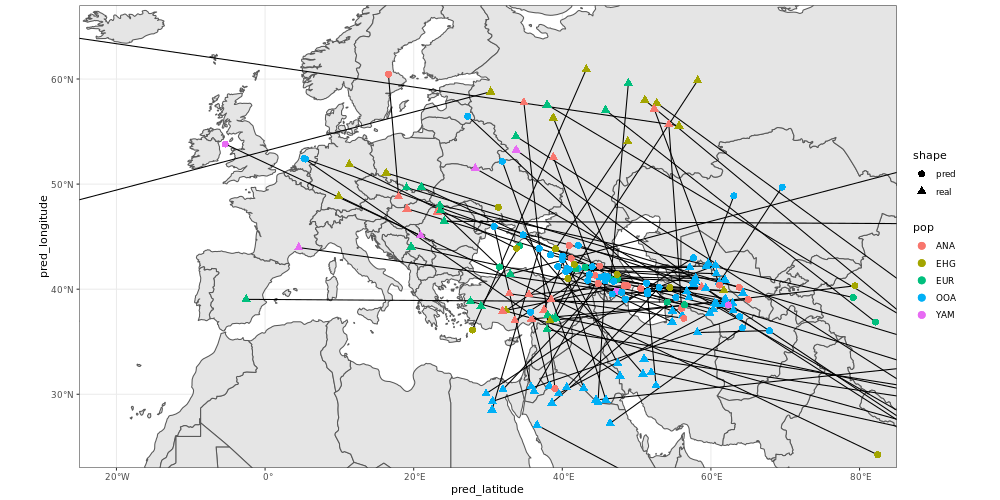

In [189]:
%%R -w 1000 -h 500

exp = "23"
sim = "europe"

set.seed(1234)

read.table(paste("../../sandbox/", sim, "/", exp, "/pred.txt", sep = ""), header = T) %>%
    left_join(read.table(paste("../../data/", sim, "/metadata.txt", sep = ""), header = T) %>% select(ind = ind_id, pop), by = c("ind")) %>%
    sample_n(100, replace = FALSE) %>%
    #left_join(error_spaceNNtime(sim = "europe", exp = exp, pre = "sNNt") %>% spread(stat, value) %>% select(ind, spacediff = space, timediff = time), by = c("ind")) %>%
    #filter(pop == "ANA") %>%
    #filter(spacediff > 900) %>%
    ggplot() +
    geom_sf(data = ne_countries(scale = "medium", returnclass = "sf")) +
    geom_segment(aes(x = pred_latitude, xend = real_latitude, y = pred_longitude, yend = real_longitude)) +
    geom_point(aes(x = real_latitude, y = real_longitude, color = pop, shape = "real"),  size = 3) +
    geom_point(aes(x = pred_latitude, y = pred_longitude, color = pop, shape = "pred"),  size = 3) +
    #geom_point(aes(x = real_latitude, y = real_longitude, color = "real", shape = "real"),  size = 3) +
    #geom_point(aes(x = pred_latitude, y = pred_longitude, color = "pred", shape = "pred"),  size = 3) +
    coord_sf(ylim = c(25, 65), xlim = c(-20, 80)) +
    #coord_sf(ylim = c(35, 50), xlim = c(40, 75)) +
    theme_bw()

In [217]:
gm = np.array([[1, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1]])
arc        = simGL.sim_allelereadcounts(gm = gm, mean_depth = cov, std_depth = 1, e = err, ploidy = 2, seed = 1234)
GL         = simGL.allelereadcounts_to_GL(arc = arc, e = err, ploidy = 2)[:, :, [0, 1, 4]]
likelihood = np.exp(-GL)
prior      = np.array([1/4, 1/2, 1/4])
GP         = likelihood*prior/(np.sum(likelihood*prior, axis = 2).reshape(GL.shape[:2] + (1,)))
print(GP)
GP.transpose((1, 0, 2)).reshape(-1).reshape(GP.shape[1], GP.shape[0]*3)

[[[4.49380428e-03 9.95427357e-01 7.88386717e-05]
  [6.58759124e-01 3.41038118e-01 2.02757502e-04]
  [1.15759227e-01 8.84205144e-01 3.56291864e-05]]

 [[6.23800015e-02 9.36525612e-01 1.09438599e-03]
  [1.55590114e-09 6.38266403e-02 9.36173358e-01]
  [8.28534135e-10 5.01477591e-01 4.98522408e-01]]]


array([[4.49380428e-03, 9.95427357e-01, 7.88386717e-05, 6.23800015e-02,
        9.36525612e-01, 1.09438599e-03],
       [6.58759124e-01, 3.41038118e-01, 2.02757502e-04, 1.55590114e-09,
        6.38266403e-02, 9.36173358e-01],
       [1.15759227e-01, 8.84205144e-01, 3.56291864e-05, 8.28534135e-10,
        5.01477591e-01, 4.98522408e-01]])

In [226]:
gm = np.array([[1, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1]])
print("gm")
print(gm.shape)
print(gm)
arc      = simGL.sim_allelereadcounts(gm = gm, mean_depth = cov, std_depth = 1, e = err, ploidy = 2, seed = 1234)
print("arc")
print(arc)
GL       = simGL.allelereadcounts_to_GL(arc = arc, e = err, ploidy = 2)[:, :, [0, 1, 4]]
print("GL")
print(GL)

print(GL.transpose((1, 0, 2)).reshape(-1).reshape(GL.shape[1], GL.shape[0]*3).T)

gm
(2, 6)
[[1 0 0 0 1 0]
 [0 0 1 1 0 1]]
arc
[[[3 2 0 0]
  [2 0 0 0]
  [3 1 0 0]]

 [[2 1 0 0]
  [0 5 0 0]
  [1 6 0 1]]]
GL
[[[ 4.70732535  0.          8.75037661]
  [ 0.          1.35151088  8.08610254]
  [ 1.34002952  0.          9.42613205]]

 [[ 2.01578495  0.          6.05883622]
  [20.21525634  3.37877719  0.        ]
  [20.21525634  0.6872368   0.        ]]]
[[ 4.70732535  0.          1.34002952]
 [ 0.          1.35151088  0.        ]
 [ 8.75037661  8.08610254  9.42613205]
 [ 2.01578495 20.21525634 20.21525634]
 [ 0.          3.37877719  0.6872368 ]
 [ 6.05883622  0.          0.        ]]
